In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("IceCreamData.csv")
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
x=df.drop("Revenue",axis=1) #features
y=df["Revenue"] # target

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
y_pred=model.predict(x_test)
y_pred

array([702.9940111, 649.729072 , 603.2329422, 521.7754452, 612.2437215,
       278.4182651, 293.9263927, 303.7343815, 528.1162401, 696.6401775,
       733.215828 , 414.423028 , 413.9140669, 679.3177906,  10.       ,
       216.183462 , 550.2785159, 569.6187562, 563.2509867, 702.9940111,
       523.1245467, 756.9625616, 726.2337713, 526.5470649, 926.0671533,
       662.5589903, 303.7343815, 642.3498137, 773.9247547, 690.7892959,
       473.5681122, 496.0112948, 702.6236136, 809.6720534, 651.5043041,
       499.4583433, 793.079011 , 339.1095829, 276.3733742, 118.8121496,
       550.7014036, 241.2785475, 553.1196514, 395.2737497, 473.5681122,
       579.3073878, 531.7424848, 118.8121496, 541.2936627, 546.6938576,
       581.0740052, 520.4703098, 451.4507843, 521.7754452, 570.9909316,
       642.3498137, 603.3053386, 629.8937918, 170.2377561, 631.3182368,
       550.7014036, 696.7166402, 516.5486011, 642.3498137, 618.2357655,
       441.5087331, 545.9039291, 499.4583433, 773.9247547, 274.0

In [8]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:1328.7245076491977
Root Mean Squared Error:36.451673591883235


In [9]:
score=r2_score(y_test,y_pred)
score

0.9534772958686918

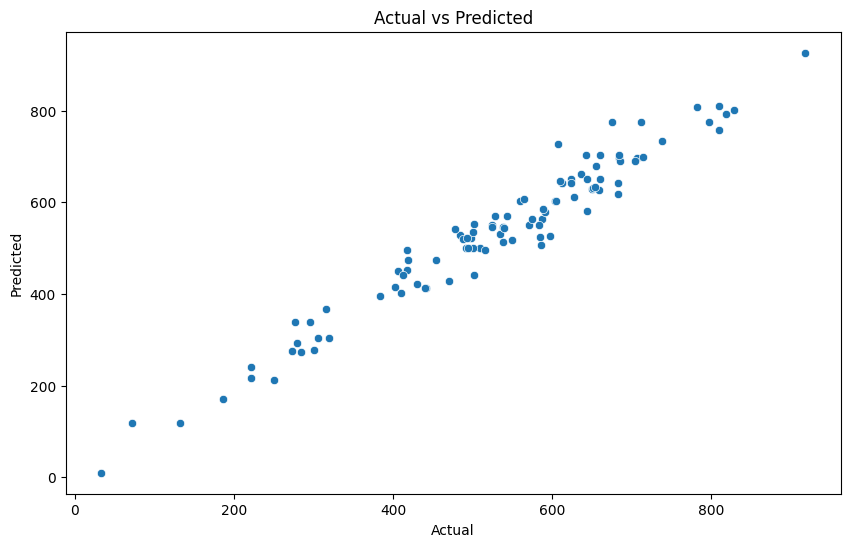

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [15]:
new_data=pd.DataFrame({
    "Temperature":[11.588157],

})
# new_data = np.array([[11.588157]])
predict=model.predict(new_data)
predict

array([257.078777])